In [3]:
#Imports
import numpy
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

In [10]:
def multi_indexing(df: pd.DataFrame, stats: dict[str, str]) -> pd.DataFrame:
    # set the multi index based on event & player name
    multiIndexDf = df.set_index(['EVENT', 'PLAYER NAME'], inplace=False)
    
    rtnDf = multiIndexDf[[*stats.keys()]]
    
    return rtnDf.rename(columns = stats)

In [27]:
csvs = ["driving_distance", "driving_accuracy", "greens_in_regulation", "proximity_to_the_hole","scrambling","sand_saves","putts_per_round"]

statsMap = {
  "driving_distance" : {
    'AVG.' : 'Driving Distance',
    'TOTAL DRIVES' : 'Total Drives'
  },
  "driving_accuracy": {
    '%' : 'Fairways Hit (%)',
    'FAIRWAYS HIT':  'Fairsways Hit',
    'POSSIBLE FAIRWAYS' : 'Possible Fairways'
  },
  "greens_in_regulation": {
    '%' : 'Greens Hit'
  },
     "proximity_to_the_hole": {
    'AVG' : 'Hole Proximity',
    'GIR RANK': 'GIR Rank'
  },
    "putts_per_round": {
    'AVG' : 'Putts'
  },
  "sand_saves": {
    '%' : 'Sand Saves (%)',
    '# SAVES': 'Sand Saves',
    '# BUNKERS' : 'Bunkers'
  },
  "scrambling" : {
    '%' : 'Scrambling (%)',
    'PAR OR BETTER' : 'Scarmbling',
    'MISSED GIR' : 'Missed GIR'
  },
}

IMPORTANT NOTES

- each stat is a 4 day average
- only players who make it to the final round (4 rounds) are considered

In [28]:
# set up inital scoring df
scoringDf = pd.read_csv('../data/raw_data/scoring_average.csv')
aggratedData = multi_indexing(scoringDf, {'AVG': 'Score'})

for file in csvs:
    currDf = pd.read_csv(f'../data/raw_data/{file}.csv')
    currDict = statsMap[file]
    
    cleanedDf = multi_indexing(currDf, currDict)
    aggratedData = pd.merge(aggratedData, cleanedDf, on=['EVENT', 'PLAYER NAME'])

aggratedData.head()

Score  Driving Distance  Total Drives  \
EVENT     PLAYER NAME                                                 
U.S. Open Matt Fitzpatrick   65.903             310.5             8   
          Scottie Scheffler  66.153             313.3             8   
          Will Zalatoris     66.153             306.3             8   
          Hideki Matsuyama   66.653             295.9             8   
          Rory McIlroy       66.903             300.9             8   

                             Fairways Hit (%)  Fairsways Hit  \
EVENT     PLAYER NAME                                          
U.S. Open Matt Fitzpatrick              69.64             39   
          Scottie Scheffler             67.86             38   
          Will Zalatoris                55.36             31   
          Hideki Matsuyama              51.79             29   
          Rory McIlroy                  55.36             31   

                             Possible Fairways  Greens Hit Hole Proximity  \
EVENT     PLAYER NAME                                                       
U.S. Open Matt Fitzpatrick                  56       72.22        35' 10"   
          Scottie Scheffler                 56       65.28         33' 9"   
          Will Zalatoris                    56       65.28         28' 3"   
          Hideki Matsuyama                  56       69.44         33' 7"   
          Rory McIlroy                      56       66.67         35' 2"   

                            GIR Rank  Scrambling (%)  Scarmbling  Missed GIR  \
EVENT     PLAYER NAME                                                          
U.S. Open Matt Fitzpatrick   6 Under           60.00          12          20   
          Scottie Scheffler  5 Under           60.00          15          25   
          Will Zalatoris     5 Under           52.00          13          25   
          Hideki Matsuyama   3 Under           72.73          16          22   
          Rory McIlroy       2 Under           54.17          13          24   

                             Sand Saves (%)  Sand Saves  Bunkers  Putts  
EVENT     PLAYER NAME                                                    
U.S. Open Matt Fitzpatrick            42.86           3        7  30.50  
          Scottie Scheffler           50.00           3        6  27.75  
          Will Zalatoris              60.00           3        5  28.25  
          Hideki Matsuyama            42.86           3        7  29.25  
          Rory McIlroy               100.00           5        5  29.00

(array([ 1.,  0.,  1.,  2.,  3.,  5.,  1.,  4.,  3.,  8.,  7., 16., 23.,
        15., 19., 27., 24., 20., 20., 20., 21., 23., 23., 22., 14., 15.,
        16., 15., 12.,  9., 11.,  4.,  6.,  3.,  2.,  4.,  1.,  2.,  0.,
         1.]),
 array([64.966   , 65.208125, 65.45025 , 65.692375, 65.9345  , 66.176625,
        66.41875 , 66.660875, 66.903   , 67.145125, 67.38725 , 67.629375,
        67.8715  , 68.113625, 68.35575 , 68.597875, 68.84    , 69.082125,
        69.32425 , 69.566375, 69.8085  , 70.050625, 70.29275 , 70.534875,
        70.777   , 71.019125, 71.26125 , 71.503375, 71.7455  , 71.987625,
        72.22975 , 72.471875, 72.714   , 72.956125, 73.19825 , 73.440375,
        73.6825  , 73.924625, 74.16675 , 74.408875, 74.651   ]),
 <BarContainer object of 40 artists>)

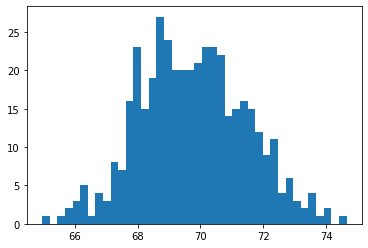

In [33]:
data = aggratedData['Score']

plt.hist(data, 40)

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  3.,  3.,  9.,  4.,  5.,  6.,  7.,
         6., 19., 14., 13., 26., 23., 19., 27., 24., 33., 25., 16., 33.,
        21., 36., 30., 15., 13., 13.,  9.,  7.,  2.,  5.,  3.,  2.,  2.,
         1.]),
 array([249.   , 251.095, 253.19 , 255.285, 257.38 , 259.475, 261.57 ,
        263.665, 265.76 , 267.855, 269.95 , 272.045, 274.14 , 276.235,
        278.33 , 280.425, 282.52 , 284.615, 286.71 , 288.805, 290.9  ,
        292.995, 295.09 , 297.185, 299.28 , 301.375, 303.47 , 305.565,
        307.66 , 309.755, 311.85 , 313.945, 316.04 , 318.135, 320.23 ,
        322.325, 324.42 , 326.515, 328.61 , 330.705, 332.8  ]),
 <BarContainer object of 40 artists>)

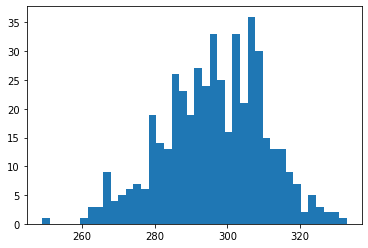

In [51]:
data = joinedDf['Avg Driving Distance (YRDS)']

plt.hist(data, 40)

In [29]:

dataTest = {'col1': [1,2,3,4],
        'col2': [1,2,3,4],
        'col3': [1,2,3,4]}

df1 = pd.DataFrame(dataTest, columns=['col1', 'col2', 'col3'])

dataTest2 = {'col2': [2,5,5,6],
            'col3': [2,5,5,6],
            'col4': [2,5,5,6]}


df2 = pd.DataFrame(dataTest2, columns=['col2', 'col3', 'col4'])
  
combined = pd.concat([df1,df2], keys=['year1', 'year2'])

# combined.loc["year1"]['col1'].iloc[3]
combined


col1  col2  col3  col4
year1 0   1.0     1     1   NaN
      1   2.0     2     2   NaN
      2   3.0     3     3   NaN
      3   4.0     4     4   NaN
year2 0   NaN     2     2   2.0
      1   NaN     5     5   5.0
      2   NaN     5     5   5.0
      3   NaN     6     6   6.0